In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
tesla = yf.Ticker("TSLA")

In [6]:
tesla_data = tesla.history(period="max")

In [ ]:
tesla_data.reset_index(inplace=True)

In [7]:
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [10]:
url ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [11]:
data  = requests.get(url).text
print(data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [12]:
soup = BeautifulSoup(data, 'html.parser')

In [14]:
soup.find_all("tbody")[1]

<tbody>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744</td>
</tr>
<tr>
<td style="text-align:center">2020-09-30</td>
<td style="text-align:center">$8,771</td>
</tr>
<tr>
<td style="text-align:center">2020-06-30</td>
<td style="text-align:center">$6,036</td>


In [15]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

In [21]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r',|\$', "", regex=True)

In [17]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [22]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [45]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [46]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

AttributeError: 'DataFrame' object has no attribute 'Date'

In [47]:
print(tesla_data.columns)
print(tesla_data.index)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
DatetimeIndex(['2010-06-29 00:00:00-04:00', '2010-06-30 00:00:00-04:00',
               '2010-07-01 00:00:00-04:00', '2010-07-02 00:00:00-04:00',
               '2010-07-06 00:00:00-04:00', '2010-07-07 00:00:00-04:00',
               '2010-07-08 00:00:00-04:00', '2010-07-09 00:00:00-04:00',
               '2010-07-12 00:00:00-04:00', '2010-07-13 00:00:00-04:00',
               ...
               '2024-11-15 00:00:00-05:00', '2024-11-18 00:00:00-05:00',
               '2024-11-19 00:00:00-05:00', '2024-11-20 00:00:00-05:00',
               '2024-11-21 00:00:00-05:00', '2024-11-22 00:00:00-05:00',
               '2024-11-25 00:00:00-05:00', '2024-11-26 00:00:00-05:00',
               '2024-11-27 00:00:00-05:00', '2024-11-29 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=3631, freq=None)


In [48]:
tesla_data = tesla_data.reset_index()

In [49]:
print(tesla_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [53]:
def make_graph(stock_data, revenue_data, stock):
    # Filtrar datos antes de las fechas especificadas
    stock_data_specific = stock_data[stock_data["Date"] <= "2021-06-14"]
    revenue_data_specific = revenue_data[revenue_data["Date"] <= "2021-04-30"]

    # Crear el gráfico
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific["Date"]), 
                             y=stock_data_specific["Close"].astype("float"), name="Share Price"), 
                  row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific["Date"]), 
                             y=revenue_data_specific["Revenue"].astype("float"), name="Revenue"), 
                  row=2, col=1)

    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    fig.show()

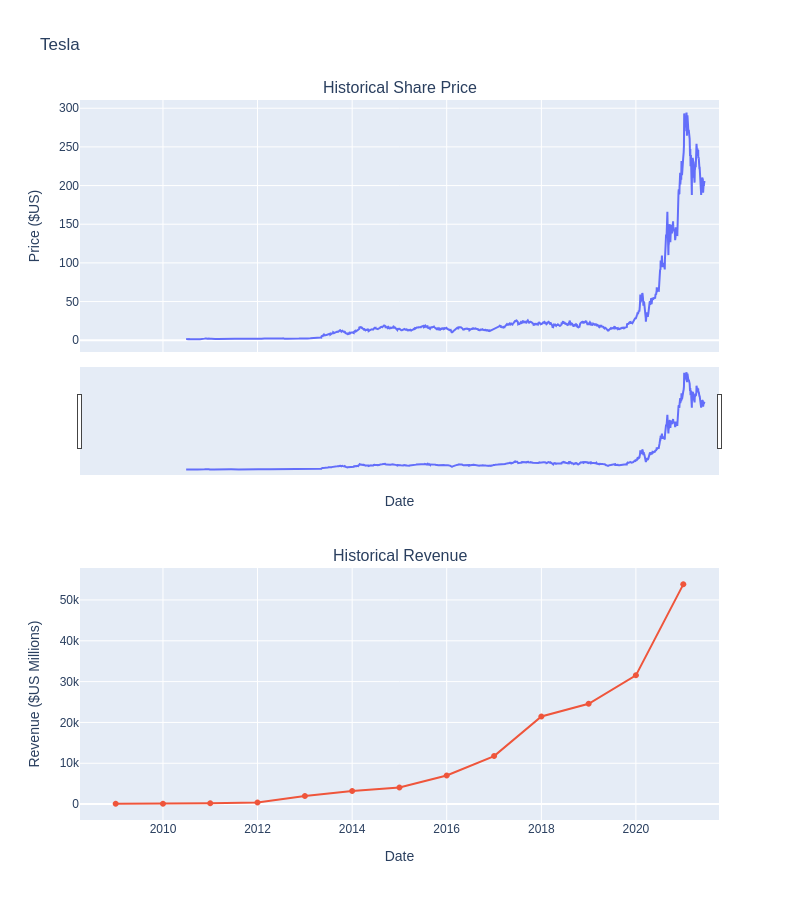

In [54]:
make_graph(tesla_data, tesla_revenue, 'Tesla')